# Probability

## Relative frequencies

In [3]:
import numpy as np
np.random.seed(9823467)

In [4]:
outcomes = np.random.randint(1, 7, size=20)
outcomes

array([6, 3, 6, 4, 2, 2, 4, 3, 3, 6, 5, 2, 5, 6, 1, 5, 5, 6, 1, 4])

In [5]:
import pandas as pd
values, counts = np.unique(outcomes, return_counts=True)
df = pd.DataFrame({'counts': counts}, index=values)
df

,counts
1,2
2,3
3,3
4,3
5,4
6,5


In [6]:
rel_freqs = counts / len(outcomes)
df['rel_freqs'] = rel_freqs
df

,counts,rel_freqs
1,2,0.10
2,3,0.15
3,3,0.15
4,3,0.15
5,4,0.20
6,5,0.25


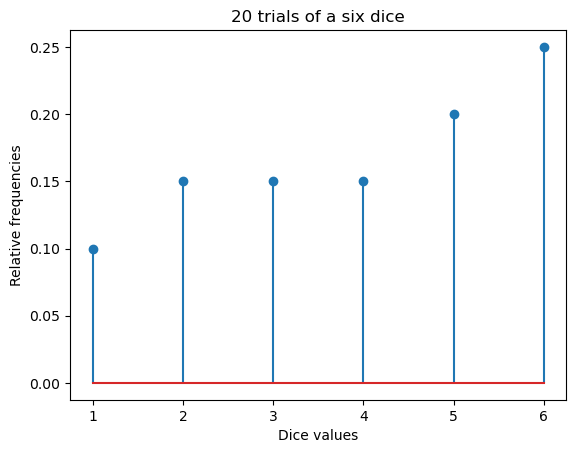

In [7]:
import matplotlib.pyplot as plt
plt.stem(values, rel_freqs)
plt.xlabel('Dice values')
plt.ylabel('Relative frequencies')
plt.title('20 trials of a six dice')
plt.show()

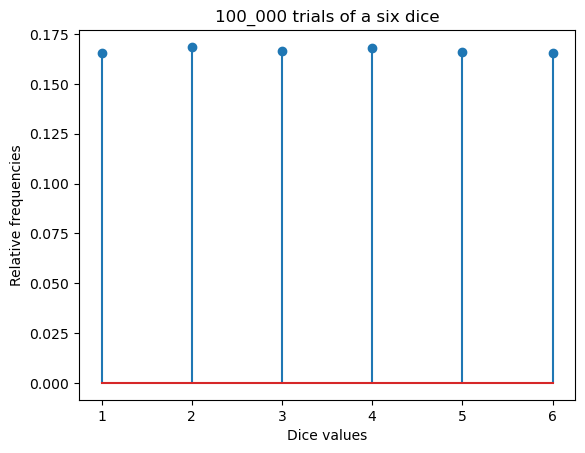

In [8]:
# 100_000 trials
outcomes100k = np.random.randint(1, 7, size=100_000)
# Create dataframe
values, counts = np.unique(outcomes100k, return_counts=True)
# Add relqtive frequencies
rel_freqs = counts / len(outcomes100k)
# Plotting
plt.stem(values, rel_freqs)
plt.xlabel('Dice values')
plt.ylabel('Relative frequencies')
plt.title('100_000 trials of a six dice')
plt.show()

## Axiomatic probability

In [10]:
num_sims = 100_000
die1 = np.random.randint(1, 7, size=num_sims)
die2 = np.random.randint(1, 7, size=num_sims)

E1 = die1 < 3
E2 = die2 < 3

Eocurred = E1 | E2
print(f'P(E1 | E2) = {np.count_nonzero(Eocurred) / num_sims}')

P(E1 | E2) = 0.55667


## Combinatorics

### Counting by iterating

In [19]:
import itertools as it

In [21]:
S0 = range(1, 7)
S1 = range(1, 7)

S = it.product(S0, S1)
for s in S:
    print(s, ' ', end='')

(1, 1)  (1, 2)  (1, 3)  (1, 4)  (1, 5)  (1, 6)  (2, 1)  (2, 2)  (2, 3)  (2, 4)  (2, 5)  (2, 6)  (3, 1)  (3, 2)  (3, 3)  (3, 4)  (3, 5)  (3, 6)  (4, 1)  (4, 2)  (4, 3)  (4, 4)  (4, 5)  (4, 6)  (5, 1)  (5, 2)  (5, 3)  (5, 4)  (5, 5)  (5, 6)  (6, 1)  (6, 2)  (6, 3)  (6, 4)  (6, 5)  (6, 6)  

In [23]:
Slist = list(it.product(S0, S1))
len(Slist)

36

In [51]:
counts = [0] * 13
for s in Slist:
    counts[sum(s)] += 1

In [57]:
probabilities = [0] * 13
for i in range(2, 13):
    probabilities[i] = counts[i] / len(Slist)
    print(f'P(E{i}) = {probabilities[i] : .4f}')

P(E2) =  0.0278
P(E3) =  0.0556
P(E4) =  0.0833
P(E5) =  0.1111
P(E6) =  0.1389
P(E7) =  0.1667
P(E8) =  0.1389
P(E9) =  0.1111
P(E10) =  0.0833
P(E11) =  0.0556
P(E12) =  0.0278


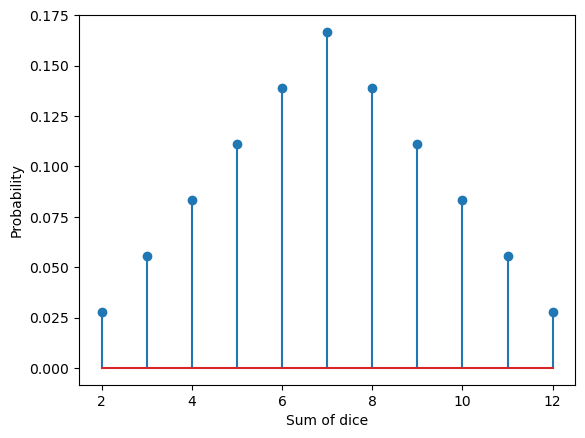

In [61]:
plt.stem(range(2, 13), probabilities[2:])
plt.xlabel('Sum of dice')
plt.ylabel('Probability')
plt.show()

### Counting by analysis

In [85]:
2**20

1048576